posx and posy should be finite values
posx and posy should be finite values


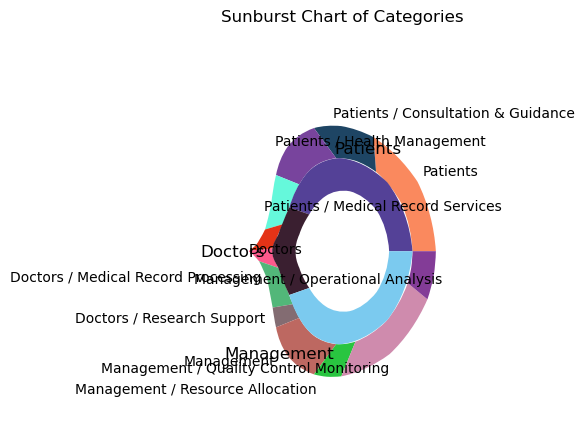

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 数据定义
data = {
    "Patients": {
        "Consultation & Guidance": ["70B", "671B"],
        "Health Management": ["32B", "70B", "671B"],
        "Medical Record Services": ["32B", "70B", "671B"]
    },
    "Doctors": {
        "Decision Support": ["32B", "70B", "671B"],
        "Medical Record Processing": ["32B", "70B", "671B"],
        "Research Support": ["671B"]
    },
    "Management": {
        "Resource Allocation": ["671B"],
        "Quality Control Monitoring": ["32B", "70B", "671B"],
        "Operational Analysis": ["671B"]
    }
}

# 将数据转换为适合旭日图的格式
def get_sunburst_data(data):
    labels = []
    sizes = []
    colors = []
    levels = []

    def add_data(category, parent_label, level):
        for sub_category, items in category.items():
            label = f"{parent_label} / {sub_category}" if parent_label else sub_category
            labels.append(label)
            sizes.append(len(items))
            colors.append(np.random.rand(3,))
            levels.append(level)
            if isinstance(items, dict):
                add_data(items, label, level + 1)

    add_data(data, "", 0)
    return labels, sizes, colors, levels

labels, sizes, colors, levels = get_sunburst_data(data)

# 绘制旭日图
fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax.axis('off')

# 绘制外层
wedges, texts = ax.pie(sizes, labels=labels, colors=colors, radius=1.2, startangle=90, counterclock=False, wedgeprops=dict(width=0.3))
for text in texts:
    text.set_fontsize(10)

# 绘制内层
inner_sizes = [sum(sizes[:len(data)])] * len(data)
inner_labels = list(data.keys())
inner_colors = [np.random.rand(3,) for _ in range(len(data))]
wedges, texts = ax.pie(inner_sizes, labels=inner_labels, colors=inner_colors, radius=0.9, startangle=90, counterclock=False, wedgeprops=dict(width=0.3))
for text in texts:
    text.set_fontsize(12)

plt.title("Sunburst Chart of Categories", y=1.1)
plt.show()